# Prática 2: Exploração de Dados - Parte II

### Lucas Yudi Sugi - 9293251
### Kelvin Guilherme de Oliveira - 9293286

Este trabalho tem como objetivo reanalisar as perguntas elaboradas na prática anterior, a fim de verificar se existe a possibilidade de melhorá-las, e, além disso, utilizar outras medidas estatísticas com a finalidade de obter uma resposta ainda melhor para as perguntas.

## Dataset 1: Diabetes

### Reavaliação das perguntas

1 - Como a progressão da doença é impactada pelo sexo do paciente ?<br>
2 - Como a progressão da doença é impactada pela faixa etária do paciente ?<br>
3 - Qual medida está mais correlacionada com a progressão da doença ?<br>

Dado que na prática I e II tivemos evidências muito fortes para responder tais perguntas e como agora o objetivo dessa prática é utilizar estatística como boxplot, histograma, covariância e correlação (medidas já utilizadas) iremos realizar outras perguntas para entender melhor os dados:

1 - Qual a relação entre BMI (Body Mass Index) e BP (Blood pressure) ? <br>
2 - Como Ldl, Hdl e Glu estão relacionados ? <br>
3 - Qual a relação entre HDL e BMI ? <br>

Tais perguntas estão sendo realizadas para tirar as seguintes dúvidas/avaliar hipóteses: <br>
1 - Quanto maior o índice de massa corporal maior será a pressão sanguínea <br> 
2 - Como as medidas sanguíneas se afetam <br>
3 - Quanto maior o índice de massa corporal maior será o nível de colesterol ruim (HDL) <br>

Tais dúvidas/hipóteses foram elaboradas porque por meio de experiências passadas acredita-se que isso ocorra. 

Para a reanálise do dataset, utilizaremos os mesmos atributos já definidos anteriomente:

BMI <br>
BP<br>
Ldl (S1)<br>
Hdl (S2)<br>
Glu (S3)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Leitura dos dados
dataset = pd.read_table('./datasets/diabetes/diabetes.tab.txt')

#Apresentação de alguns dados
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


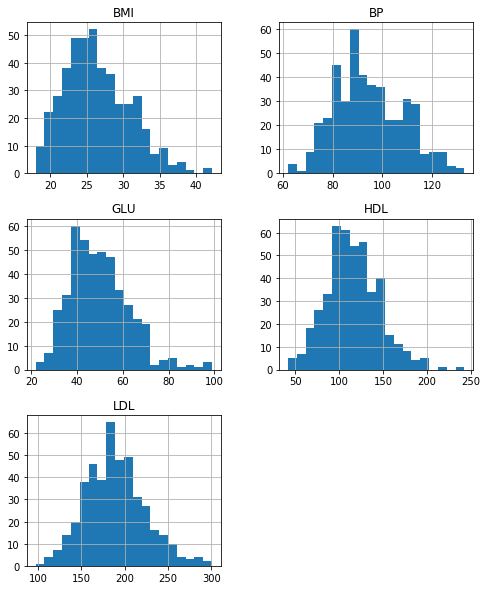

In [2]:
#Extraindo apenas os atributos necessarios
diabete = dataset[['BMI','BP','S1','S2','S3','Y']].copy()

#Renomeando colunas
diabete.columns = ['BMI','BP','LDL','HDL','GLU','CLASS']

#Plotando o histograma
diabete.iloc[:,0:5].hist(figsize=(8,10),bins=20)
plt.show()

## Histograma

Plote os histograma dos atributos selecionados. <br><br>
Como você fez a escolha do parâmetro de intervalo (bin)? Por faixa (para altura, por exemplo, intervalo
de 5cm), por quantidade (cada intervalo com tamanho 5, 0-5, 5-10, ...) ... ? Por que? <br><br>
O parâmetro bin pode ser complicado para ajustar corretamente e pode distorcer bastante o histograma.
Uma regra prática é tentar garantir que cada intervalo tenha um número mínimo de exemplos, uns 30
em cada bin deve ser suficiente. Mesmo assim nos bins das pontas é difícil cumprir essa regra.<br><br>
Se achar interessante para sua análise, divida os dados de algum atributo e plote o histograma para cada
parte sobreposto. 


Explique a relação do histograma com o boxplot, o que um mostra que o outro não? Como é possível
inferir um do outro? Sugestão: plotar um boxplot e um histograma de um mesmo atributo pode ajudar a
entender e responder a pergunta. <br><br>
Análise multivariada. <br><br>
Muitas vezes a análise univariada, análise de cada atributo individualmente, não é muito informativa.
Por isso também utilizamos a análise multivariada, nesta prática utilizaremos uma análise bivariada,
analisando 2 atributos ao mesmo tempo. <br><br>

## Resposta

Para escolher o parâmetro bin testamos diversos valores desde valores pequenos como 2 e 5 a valores grandes tais como 100. Com isso podemos perceber que o valor 20 é o que melhor apresenta o comportamento dos dados devido a semelhança com a distribuição normal, garantindo que cada intervalo tenha no mínimo 22 exemplos (442/20).

A relação entre o histograma e boxplot é que ambos tentam representar a distribuição dos dados, sendo que o histograma mostra melhor a curva da distribuição dos dados enquanto que o boxplot permite visualizar a mediana, mínimo e máximo, e quartis de uma forma mais simplória. Podemos inferir o histograma por meio do boxplot ao utilizar a distância entre os quartis Q1 e Q3 (curtose) e a mediana (simetria), e o contrário pode ser obtido por meio do cálculo dos parâmetros necessários da curva gerada.

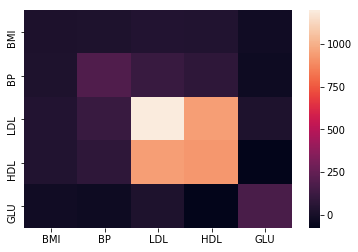

In [3]:
#Calculo da covariancia
cov = diabete.iloc[:,0:5].cov()

#Plotando o heatmap
sns.heatmap(cov)
plt.show()

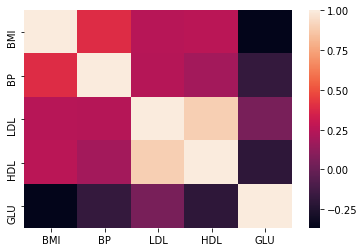

In [4]:
#Calculo da correlação
corr = diabete.iloc[:,0:5].corr()

#Plotando o heatmap
sns.heatmap(corr)
plt.show()

## Covariância e a correlação
No seu caso, qual das duas é mais informativa? Explique. <br><br>
Qual a diferença entre as duas e quando é mais indicado utilizar uma ao invés da outra? <br><br>
De que forma elas ajudam, se é que ajudam, a responder suas perguntas? <br><br>

## Resposta

A correlação é mais informativa que a covariância por não termos a influência da unidade de medida, permitindo que haja um melhor entendimento dos dados. Sendo assim, a diferença entre as duas é que a correlação elimina a influência da faixa de valores.

Quando se deseja avaliar o grau de linearidade entre os atributos a correlação é mais indicada, pois ela permite interpretar de forma mais precisa tal relação. Já a covariância pode ser utilizada para verificar a variabilidade de um atributo, sua matriz também é importante pois ela é base para vários cálculos estatísticos.

Como nossas perguntas referem-se ao relacionamento entre os atributos, essas medidas são totalmente cabíveis de serem avaliadas para auxiliarem na formulação de hipóteses.

## Scatter Plot

Gere em um único gráfico os scatter plots dos atributos selecionados, como no slide. Mude a cor dos
exemplos de maneira a ajudar na interpretação do problema e a responder suas perguntas. <br><br>

Por exemplo, no iris se colorir os exemplos por classe é possível ver que a classe setosa não tem
sobreposição com as outras duas para dois dos scatter plots. <br><br>

Além da separação entre classes, o scatter plot permite uma inspeção visual rápida de grupos (clusters). <br>

## Resposta

Geramos o gráfico de dispersão conforme abaixo. Dado que o nosso atributo classe é contínuo não fez sentido realizar uma separação por cores.

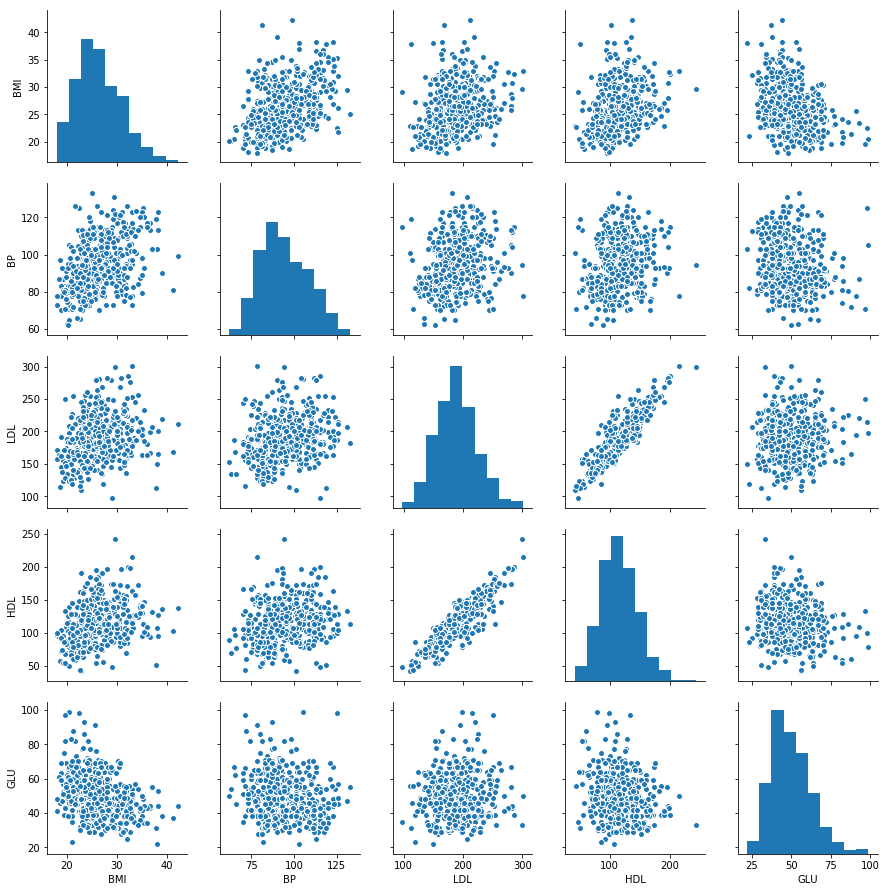

In [9]:
sns.pairplot(data=diabete.iloc[:,0:5])
plt.show()

## Gráficos

Explique como os gráficos permitem uma inspeção mais fácil e intuitiva de tendências, padrões e
outliers? Se achar mais fácil use exemplos já explorados mas refaça os gráficos aqui para ilustrar seu
ponto.

Com os scatter plots podemos facilmente identificar a tendência entre duas variáveis como ocorre entre HDL e LDL. Note que há um relacionamento linear entre ambas. Caso os dados sejam linearmente separáveis é possível também identificar isso por meio dos gráficos. Com relação aos outliers podemos identificá-los por meio dos pontos que estão muito fora da nuvem de dados como ocorre, por exemplo, em GLU e BP (100,125).

## Reavaliação das hipóteses

Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser
respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas. <br>

Tenha em mente que futuramente utilizaremos alguns algoritmos simples de classificação e suas
questões poderão ser respondidas por eles. Isto não influenciará sua nota, é apenas para motivar que a
fazer perguntas que poderão ser efetivamente respondidas. Até agora o que foi feita foi uma análise
descritiva, vocês tentaram entender um pouco dos dados e do problema que os dados representa.